## Análisis de la columna "location"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Obtenemos el dataframe:

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
len(df)

7613

In [4]:
df.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
len(df.loc[df["location"].isna()]) # Cantidad de tweets sin ubicación

2533

Se observa que `location` es la columna con la mayor cantidad de valores nulos. Una pregunta que podríamos hacernos es, ¿influye que el tweet tenga o no ubicación en la veracidad del mismo?

In [6]:
location_not_null_target = df.loc[df["location"].notnull()]["target"].value_counts()
location_not_null_target

0    2884
1    2196
Name: target, dtype: int64

In [7]:
location_null_target = df.loc[df["location"].isna()]["target"].value_counts()
location_null_target

0    1458
1    1075
Name: target, dtype: int64

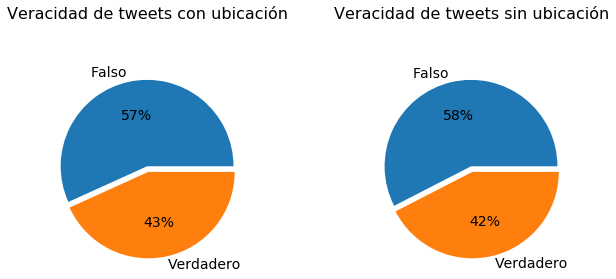

In [8]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(
    location_not_null_target,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets con ubicación", y=1.5, fontsize=16)

ax2 = fig.add_axes([.75, 0, .5, .5], aspect=1)
ax2.pie(
    location_null_target,
    autopct="%1.0f%%",
    explode=(0.05, 0.05),
    labels=("Falso", "Verdadero"),
    radius=1.5,
    textprops={"fontsize": 14}
)
plt.title("Veracidad de tweets sin ubicación", y=1.5, fontsize=16)

plt.show()

Se observa que en ambos casos, hay más tweets falsos que verdaderos. Sin embargo, no existe una diferencia significativa en las proporciones, por lo cual no parecería existir una relación entre la presencia o ausencia de una ubicación en un tweet con la veracidad del mismo.

A continuación podemos ver cuántos tweets tenemos de cada ubicación:

In [9]:
df["location"].value_counts()

USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
                                 ... 
The Shady Hyenatown of Finland      1
The Pumpkin Carriage of Dreams      1
lagos nigeria                       1
pissing off antis                   1
DC, frequently NYC/San Diego        1
Name: location, Length: 3341, dtype: int64

In [10]:
df["location"].value_counts().describe()

count    3341.000000
mean        1.520503
std         3.022364
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       104.000000
Name: location, dtype: float64

Como se puede ver, varias de las ubicaciones más frecuentes pertenecen a los Estados Unidos, siendo `USA` la que mayor cantidad de tweets tiene. También se puede observar que existen valores que no se corresponden con ubicaciones reales, con poca densidad.

In [11]:
df["location"].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [12]:
df["location"].value_counts().tail(10)

North Vancouver, BC               1
Rio                               1
S.F. Bay area                     1
IG: AyshBanaysh                   1
Weston super mare                 1
The Shady Hyenatown of Finland    1
The Pumpkin Carriage of Dreams    1
lagos nigeria                     1
pissing off antis                 1
DC, frequently NYC/San Diego      1
Name: location, dtype: int64

Podemos obtener, por ejemplo, los tweets de las 10 ubicaciones más frecuentes:

In [13]:
top_locations = df["location"].value_counts().nlargest(10).index.to_list()
tweets_from_top_locations = df[df["location"].isin(top_locations)]

Y con estos datos realizar un gráfico:

Text(0, 0.5, 'Ubicación')

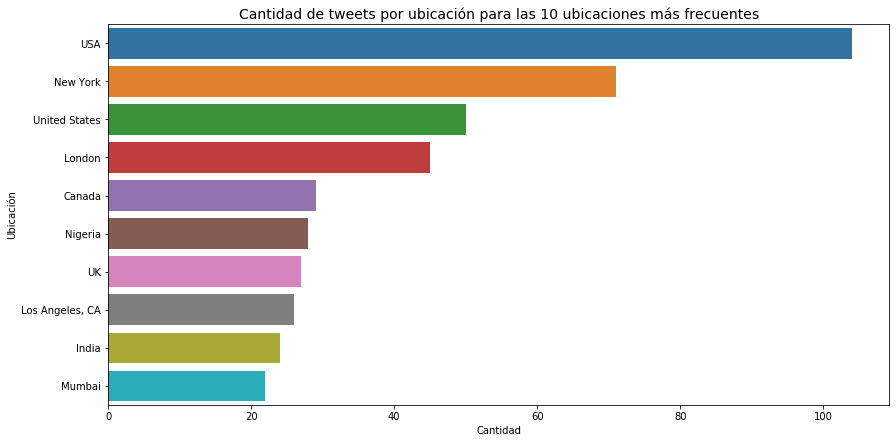

In [14]:
plt.figure(figsize=(14,7))

sns.countplot(
    y="location",
    data=tweets_from_top_locations,
    order=top_locations
)

plt.title("Cantidad de tweets por ubicación para las 10 ubicaciones más frecuentes", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Ubicación")

Analicemos ahora los tweets diferenciándolos por su `target`:

In [15]:
real_tweets = df.loc[df["target"] == 1]
false_tweets = df.loc[df["target"] == 0]

In [16]:
len(real_tweets)

3271

In [17]:
real_tweets["location"].value_counts().head(10)

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
UK                16
New York          16
London            16
Washington, DC    15
Canada            13
Name: location, dtype: int64

In [18]:
len(false_tweets)

4342

In [19]:
false_tweets["location"].value_counts().head(10)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
Name: location, dtype: int64

In [20]:
tweet_counts = (df.groupby(["location", "target"])
                .agg({"text": "count"})
                .reset_index()
                .rename(columns={"text": "count"}))

tweet_counts_from_top_locations = tweet_counts.loc[tweet_counts["location"].isin(top_locations)]

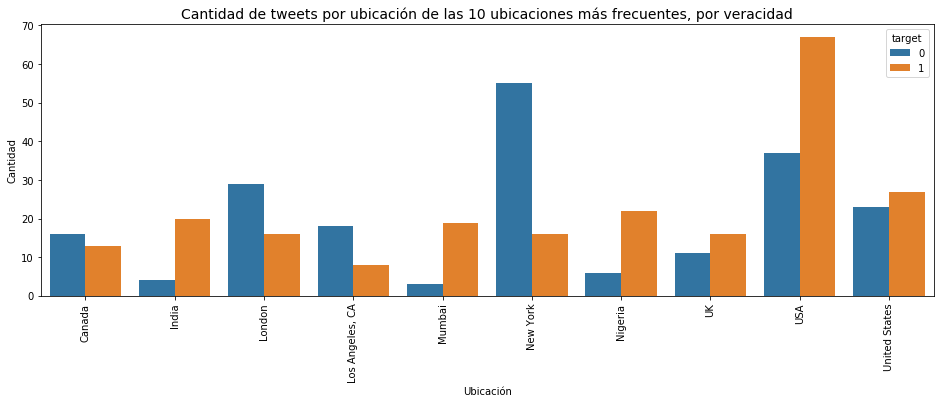

In [21]:
plt.figure(figsize=(16,5))
p = sns.barplot(x="location", y="count", hue="target", data=tweet_counts_from_top_locations)
plt.title("Cantidad de tweets por ubicación de las 10 ubicaciones más frecuentes, por veracidad", fontsize=14)
plt.xlabel("Ubicación")
plt.ylabel("Cantidad")
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()